In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# Create a small dataframe
# Taking a 2 feature - height and weight
# Both are corrleated(linearly)
# currently - 2D data -> transforming it to 1D 
# find a new axes where variance is more using PCA

df = pd .DataFrame(data = {"height" : [170, 160, 175],"weight": [65, 59, 70]}
                   , columns = ["height", "weight"])
df

,height,weight
0,170,65
1,160,59
2,175,70


In [6]:
# height and weight are on different scale 
# standardize_data 
df_sc = pd.DataFrame(columns=["height", "weight"])
df_sc["height"] = df["height"] - df["height"].mean()
df_sc["weight"] = df["weight"] - df["weight"].mean()
df_sc

,height,weight
0,1.666667,0.333333
1,-8.333333,-5.666667
2,6.666667,5.333333


In [12]:
# FInd a covariance 
cov = np.cov(df_sc.T, bias=False)
cov

array([[58.33333333, 41.66666667],
       [41.66666667, 30.33333333]])

In [13]:
# find a eigen vector / eigen values
eigval, eigvec = np.linalg.eig(cov)
eigval, eigvec 

(array([88.2891192 ,  0.37754747]),
 array([[ 0.81194269, -0.58373715],
        [ 0.58373715,  0.81194269]]))

In [24]:
# find top index - where eigval is more
idx = eigval.argsort()[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]
eigvec, eigval


(array([[ 0.81194269, -0.58373715],
        [ 0.58373715,  0.81194269]]),
 array([88.2891192 ,  0.37754747]))

In [28]:
projection =df_sc @ eigvec[:, 0].reshape(-1, 1)
projection

,0
0,1.547817
1,-10.074033
2,8.526216


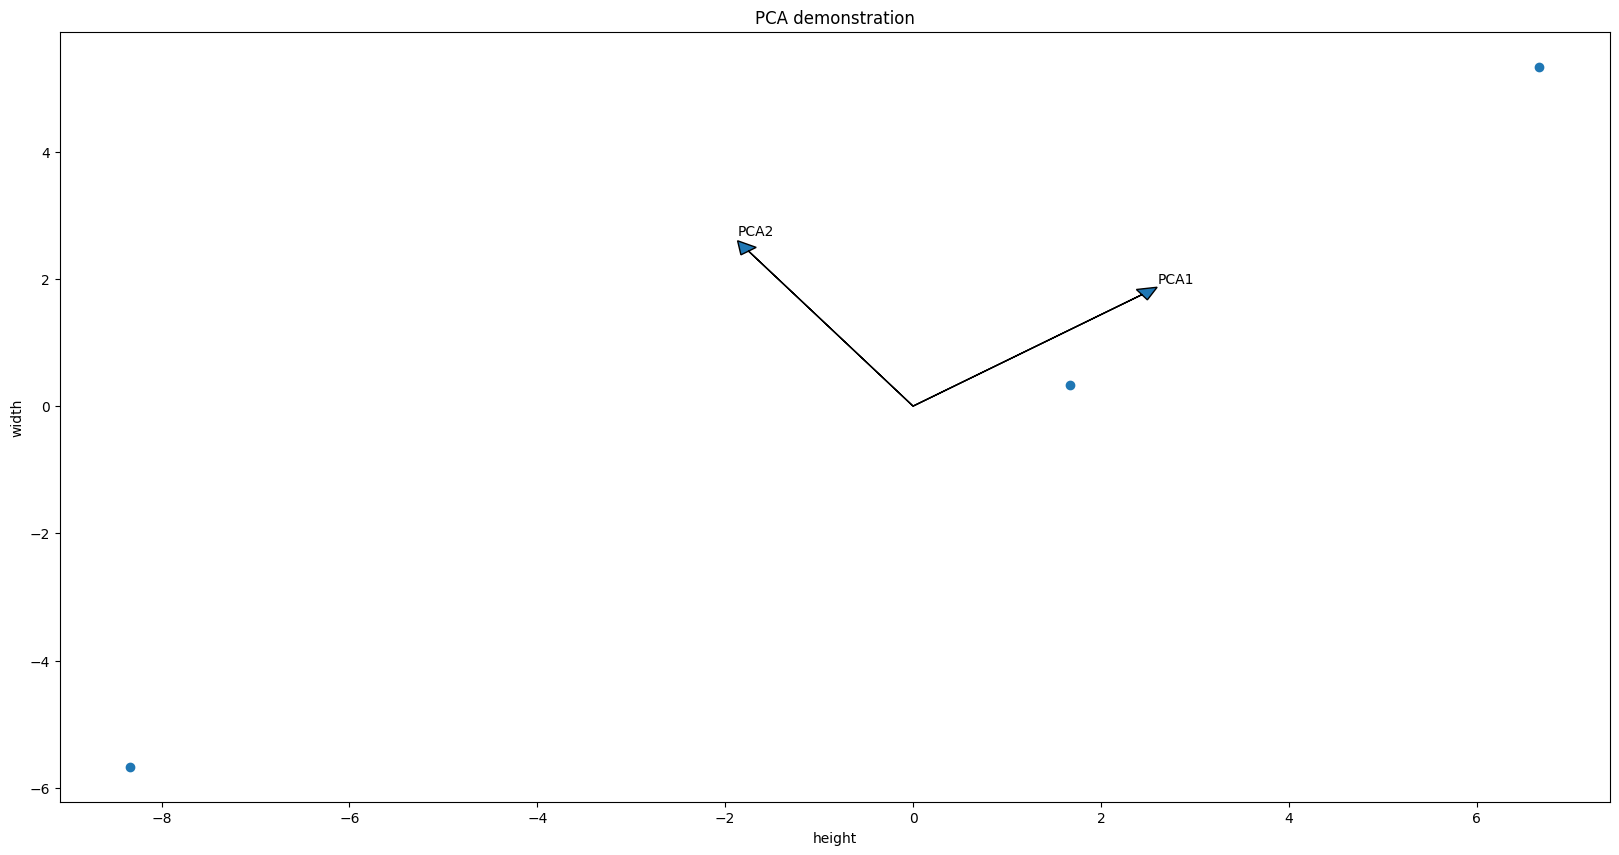

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(x=df_sc.iloc[:,0], y=df_sc.iloc[:,1])
plt.xlabel("height")
plt.ylabel("width")
plt.title("PCA demonstration")

for i, k in enumerate(eigvec):
    plt.arrow(0,0, eigvec[0,i] * 3 , eigvec[1,i] * 3, head_width=0.2, head_length=0.2) 
    plt.text(eigvec[0,i] * 3.2 , eigvec[1,i] * 3.3, f'PCA{i+1}') 

PCA1 has more variance